# Урок 2. Feed-forward neural network


## Домашнее задание

1. Добиться хорошего результата от модели, собранной на занятии (5 угаданныx картинок из 8 предложенных). Варианты изменений:
- изменение слоёв и их количества;
- изменение метода оптимизации;
- изменение процесса обучения;
- *преобразование данных transform

2. *Переписать данный туториал на PyTorch: https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ru

### Подключение библиотек

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from torch import nn
from torch import optim

import torchvision
import torch.nn.functional as F
import torchvision.transforms as transforms

### Загрузка данных

In [4]:
train_dataset = torchvision.datasets.CIFAR10(root='data/',
                                              train=True,
                                              transform=transforms.ToTensor(), 
                                              download=True)


image, label = train_dataset[0]
print(image.size())
print(label)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/cifar-10-python.tar.gz to data/
torch.Size([3, 32, 32])
6


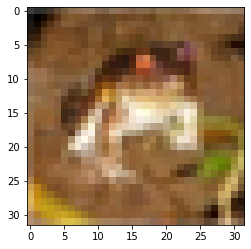

In [5]:
plt.imshow(image.permute(1, 2, 0).numpy())

In [6]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

In [7]:
test_dataset = torchvision.datasets.CIFAR10(root='./data', 
                                            train=False,
                                            download=True,
                                            transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, 
                                          batch_size=50,
                                          shuffle=False)

Files already downloaded and verified


In [8]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

### Создание и обучение нейронной сети

In [9]:
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 4 * hidden_dim)
        self.fc2 = nn.Linear(4 * hidden_dim, 2 * hidden_dim)
        self.fc3 = nn.Linear(2 * hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        return x
    
    def predict(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        x = F.softmax(x)
        return x


net = Net(3072, 100, 10)
net.train()

Net(
  (fc1): Linear(in_features=3072, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=10, bias=True)
)

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.0)

In [11]:
num_epochs = 5

for epoch in range(num_epochs):
    running_loss = 0.0
    running_items = 0.0


    for i, data in enumerate(train_loader):
        inputs, labels = data[0], data[1]

         # Обнуляем градиент
        optimizer.zero_grad()
        # Делаем предсказание
        outputs = net(inputs)
        # Рассчитываем лосс-функцию
        loss = criterion(outputs, labels)
        # Делаем шаг назад по лоссу
        loss.backward()
        # Делаем шаг нашего оптимайзера
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        running_items += len(labels)
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print(f'Epoch [{epoch + 1}/{num_epochs}]. ' \
                  f'Step [{i + 1}/{len(train_loader)}]. ' \
                  f'Loss: {running_loss / running_items:.3f}')
            running_loss, running_items = 0.0, 0.0

print('Training is finished!')

Epoch [1/5]. Step [1/782]. Loss: 0.036
Epoch [1/5]. Step [301/782]. Loss: 0.036
Epoch [1/5]. Step [601/782]. Loss: 0.035
Epoch [2/5]. Step [1/782]. Loss: 0.035
Epoch [2/5]. Step [301/782]. Loss: 0.033
Epoch [2/5]. Step [601/782]. Loss: 0.032
Epoch [3/5]. Step [1/782]. Loss: 0.034
Epoch [3/5]. Step [301/782]. Loss: 0.030
Epoch [3/5]. Step [601/782]. Loss: 0.030
Epoch [4/5]. Step [1/782]. Loss: 0.028
Epoch [4/5]. Step [301/782]. Loss: 0.029
Epoch [4/5]. Step [601/782]. Loss: 0.029
Epoch [5/5]. Step [1/782]. Loss: 0.028
Epoch [5/5]. Step [301/782]. Loss: 0.028
Epoch [5/5]. Step [601/782]. Loss: 0.028
Training is finished!


### Выполнение предсказаний

In [12]:
data_iter = iter(test_loader)
images, labels = data_iter.next()

GroundTruth:  cat ship ship plane frog frog car frog cat car plane truck dog horse truck ship dog horse ship frog horse plane deer truck dog bird deer plane truck frog frog dog deer dog truck bird deer car truck dog deer frog dog frog plane truck cat truck horse frog


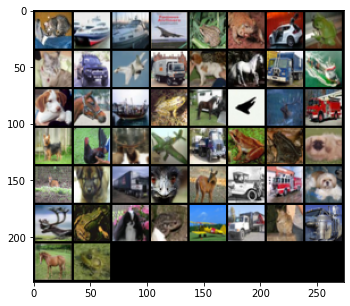

In [13]:
net.eval()
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.figure(figsize=(10, 5))
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join(classes[labels[j]] for j in range(len(labels))))

In [14]:
print(outputs)

tensor([[-3.7586e-01, -1.1439e-01,  3.4742e-01,  1.3653e+00, -7.3881e-02,
          1.5912e+00,  3.5495e-01, -1.3817e+00,  3.4920e-02, -2.1890e+00],
        [ 1.8125e+00,  1.9069e+00, -7.2317e-01, -9.9506e-01, -1.1523e+00,
         -1.5804e+00, -2.4952e+00, -4.2411e-01,  3.4606e+00,  2.8091e+00],
        [ 2.2647e+00,  5.9604e-01, -9.6853e-02, -6.6385e-01, -7.5033e-01,
         -8.0245e-01, -2.9338e+00, -4.2280e-01,  3.6643e+00,  1.3851e+00],
        [ 2.4101e+00, -4.3088e-01,  9.4231e-01, -6.0790e-01,  1.5846e-01,
         -6.0355e-01, -2.3511e+00, -1.2555e-01,  2.6848e+00, -1.3519e-01],
        [-6.4316e-01, -1.9484e+00,  1.2429e+00,  5.3786e-01,  1.5686e+00,
          8.1530e-01,  8.9919e-01,  1.0468e+00, -1.9096e+00, -2.0237e+00],
        [-1.7758e+00, -1.7477e-01,  2.7250e-01,  9.2311e-01,  6.0373e-01,
          8.3332e-01,  1.9621e+00,  2.8714e-02, -2.4751e+00, -8.0229e-01],
        [-1.7706e+00,  3.0301e-01, -4.9064e-01,  1.8243e+00, -5.0477e-01,
          2.0868e+00,  1.3191e+0

In [15]:
_, predicted = torch.max(outputs, 1)

predicted

tensor([5, 8, 8, 8, 4, 6, 5, 4, 2, 8, 0, 9, 6, 1, 0, 2, 5, 7, 8, 6, 7, 0, 0, 9,
        4, 4, 7, 7, 9, 6, 6, 2, 5, 6, 9, 7, 4, 9, 9, 5, 0, 4, 9, 4, 0, 8, 6, 8,
        4, 4])

In [16]:
gt = np.array([classes[labels[j]] for j in range(len(labels))])
pred = np.array([classes[predicted[j]] for j in range(len(labels))])

print(gt)
print(pred)
print(f'Accuracy is {(gt == pred).sum() / len(gt)}')

['cat' 'ship' 'ship' 'plane' 'frog' 'frog' 'car' 'frog' 'cat' 'car'
 'plane' 'truck' 'dog' 'horse' 'truck' 'ship' 'dog' 'horse' 'ship' 'frog'
 'horse' 'plane' 'deer' 'truck' 'dog' 'bird' 'deer' 'plane' 'truck' 'frog'
 'frog' 'dog' 'deer' 'dog' 'truck' 'bird' 'deer' 'car' 'truck' 'dog'
 'deer' 'frog' 'dog' 'frog' 'plane' 'truck' 'cat' 'truck' 'horse' 'frog']
['dog' 'ship' 'ship' 'ship' 'deer' 'frog' 'dog' 'deer' 'bird' 'ship'
 'plane' 'truck' 'frog' 'car' 'plane' 'bird' 'dog' 'horse' 'ship' 'frog'
 'horse' 'plane' 'plane' 'truck' 'deer' 'deer' 'horse' 'horse' 'truck'
 'frog' 'frog' 'bird' 'dog' 'frog' 'truck' 'horse' 'deer' 'truck' 'truck'
 'dog' 'plane' 'deer' 'truck' 'deer' 'plane' 'ship' 'frog' 'ship' 'deer'
 'deer']
Accuracy is 0.4


Если в исходной сети ничего не менять то достигается accuracy 0.46

### Изменение слоёв и их количества

In [17]:
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 8 * hidden_dim) # добавлено
        self.fc2 = nn.Linear(8 * hidden_dim, 4 * hidden_dim)
        self.fc3 = nn.Linear(4 * hidden_dim, 2 * hidden_dim)
        self.fc4 = nn.Linear(2 * hidden_dim, hidden_dim) 
        self.fc5 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x) # добавлено
        x = F.relu(x) # добавлено
        x = self.fc5(x)
        return x
    
    def predict(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        x = F.relu(x) # добавлено
        x = self.fc5(x) # добавлено
        x = F.softmax(x)
        return x


net = Net(3072, 100, 10)
net.train()

Net(
  (fc1): Linear(in_features=3072, out_features=800, bias=True)
  (fc2): Linear(in_features=800, out_features=400, bias=True)
  (fc3): Linear(in_features=400, out_features=200, bias=True)
  (fc4): Linear(in_features=200, out_features=100, bias=True)
  (fc5): Linear(in_features=100, out_features=10, bias=True)
)

### Изменение метода оптимизации. Изменение процесса обучения

Изменили SGD на Adagrad

In [18]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adagrad(net.parameters(), lr=0.001)

Увеличили количество эпох с 5 до 15. Для обучения используем CUDA

In [31]:
num_epochs = 15
with torch.cuda.device("cuda:0"):
    for epoch in range(num_epochs):
        running_loss = 0.0
        running_items = 0.0


        for i, data in enumerate(train_loader):
            inputs, labels = data[0], data[1]

             # Обнуляем градиент
            optimizer.zero_grad()
            # Делаем предсказание
            outputs = net(inputs)
            # Рассчитываем лосс-функцию
            loss = criterion(outputs, labels)
            # Делаем шаг назад по лоссу
            loss.backward()
            # Делаем шаг нашего оптимайзера
            optimizer.step()

            # выводим статистику о процессе обучения
            running_loss += loss.item()
            running_items += len(labels)
            if i % 500 == 0:    # печатаем каждые 500 mini-batches
                print(f'Epoch [{epoch + 1}/{num_epochs}]. ' \
                      f'Step [{i + 1}/{len(train_loader)}]. ' \
                      f'Loss: {running_loss / running_items:.3f}')
                running_loss, running_items = 0.0, 0.0

print('Training is finished!')

Epoch [1/15]. Step [1/782]. Loss: 0.022
Epoch [1/15]. Step [501/782]. Loss: 0.022
Epoch [2/15]. Step [1/782]. Loss: 0.022
Epoch [2/15]. Step [501/782]. Loss: 0.022
Epoch [3/15]. Step [1/782]. Loss: 0.024
Epoch [3/15]. Step [501/782]. Loss: 0.022
Epoch [4/15]. Step [1/782]. Loss: 0.022
Epoch [4/15]. Step [501/782]. Loss: 0.022
Epoch [5/15]. Step [1/782]. Loss: 0.023
Epoch [5/15]. Step [501/782]. Loss: 0.022
Epoch [6/15]. Step [1/782]. Loss: 0.023
Epoch [6/15]. Step [501/782]. Loss: 0.022
Epoch [7/15]. Step [1/782]. Loss: 0.023
Epoch [7/15]. Step [501/782]. Loss: 0.022
Epoch [8/15]. Step [1/782]. Loss: 0.025
Epoch [8/15]. Step [501/782]. Loss: 0.021
Epoch [9/15]. Step [1/782]. Loss: 0.021
Epoch [9/15]. Step [501/782]. Loss: 0.021
Epoch [10/15]. Step [1/782]. Loss: 0.022
Epoch [10/15]. Step [501/782]. Loss: 0.021
Epoch [11/15]. Step [1/782]. Loss: 0.020
Epoch [11/15]. Step [501/782]. Loss: 0.021
Epoch [12/15]. Step [1/782]. Loss: 0.025
Epoch [12/15]. Step [501/782]. Loss: 0.021
Epoch [13/

GroundTruth:  cat ship ship plane frog frog car frog cat car plane truck dog horse truck ship dog horse ship frog horse plane deer truck dog bird deer plane truck frog frog dog deer dog truck bird deer car truck dog deer frog dog frog plane truck cat truck horse frog


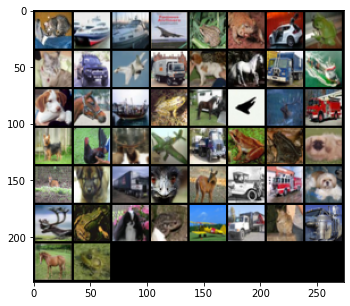

In [32]:
data_iter = iter(test_loader)
images, labels = data_iter.next()

net.eval()
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.figure(figsize=(10, 5))
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join(classes[labels[j]] for j in range(len(labels))))

In [33]:
_, predicted = torch.max(outputs, 1)

predicted

tensor([3, 9, 8, 0, 4, 6, 3, 6, 2, 1, 8, 9, 5, 7, 9, 8, 5, 7, 8, 6, 9, 2, 0, 9,
        4, 6, 6, 4, 9, 6, 6, 4, 4, 5, 9, 1, 6, 9, 9, 5, 0, 6, 7, 6, 0, 9, 3, 3,
        4, 6])

In [34]:
gt = np.array([classes[labels[j]] for j in range(len(labels))])
pred = np.array([classes[predicted[j]] for j in range(len(labels))])

print(gt)
print(pred)
print(f'Accuracy is {(gt == pred).sum() / len(gt)}')

['cat' 'ship' 'ship' 'plane' 'frog' 'frog' 'car' 'frog' 'cat' 'car'
 'plane' 'truck' 'dog' 'horse' 'truck' 'ship' 'dog' 'horse' 'ship' 'frog'
 'horse' 'plane' 'deer' 'truck' 'dog' 'bird' 'deer' 'plane' 'truck' 'frog'
 'frog' 'dog' 'deer' 'dog' 'truck' 'bird' 'deer' 'car' 'truck' 'dog'
 'deer' 'frog' 'dog' 'frog' 'plane' 'truck' 'cat' 'truck' 'horse' 'frog']
['cat' 'truck' 'ship' 'plane' 'deer' 'frog' 'cat' 'frog' 'bird' 'car'
 'ship' 'truck' 'dog' 'horse' 'truck' 'ship' 'dog' 'horse' 'ship' 'frog'
 'truck' 'bird' 'plane' 'truck' 'deer' 'frog' 'frog' 'deer' 'truck' 'frog'
 'frog' 'deer' 'deer' 'dog' 'truck' 'car' 'frog' 'truck' 'truck' 'dog'
 'plane' 'frog' 'horse' 'frog' 'plane' 'truck' 'cat' 'cat' 'deer' 'frog']
Accuracy is 0.6


При изменении исходной сети и параметров её обучения удалось увеличить accuracy с 0.4 до 0.6